In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 34.1/235.7 GB disk)


In [28]:
import os
from ultralytics import YOLO

In [29]:
root_path = '/content/drive/MyDrive/data'

In [30]:
model = YOLO("yolov8m.yaml")

results = model.train(data=os.path.join(root_path, "google_colab_config.yaml"), epochs=50, imgsz=128)



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [31]:
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8m summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/data/labels/test.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.28it/s]
                   all        532       1161          1        0.5      0.497      0.343
                cabeca        532        532          1          1      0.995      0.687
                  olho        532        629          1          0          0          0
Speed: 0.0ms preprocess, 4.0ms infer

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd5af3073d0>
fitness: 0.3588401151664148
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.68687,           0])
names: {0: 'cabeca', 1: 'olho'}
plot: True
results_dict: {'metrics/precision(B)': 0.9999522143450084, 'metrics/recall(B)': 0.5, 'metrics/mAP50(B)': 0.4975, 'metrics/mAP50-95(B)': 0.34343346129601643, 'fitness': 0.3588401151664148}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.036062154554782955, 'inference': 3.999799265897363, 'loss': 0.0010119344955100153, 'postprocess': 0.9333276210870958}

In [32]:
results = model.val(data=os.path.join(root_path, "google_colab_config.yaml"))

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
val: Scanning /content/drive/MyDrive/data/labels/test.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  7.24it/s]
                   all        532       1161          1        0.5      0.497      0.343
                cabeca        532        532          1          1      0.995      0.687
                  olho        532        629          1          0          0          0
Speed: 0.0ms preprocess, 3.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val2


In [33]:
import os

results_dir = 'runs/detect/val2'

result_images = os.listdir(results_dir)
print(result_images)


['val_batch2_labels.jpg', 'confusion_matrix.png', 'R_curve.png', 'F1_curve.png', 'val_batch2_pred.jpg', 'val_batch0_labels.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'confusion_matrix_normalized.png', 'val_batch0_pred.jpg', 'P_curve.png', 'PR_curve.png']


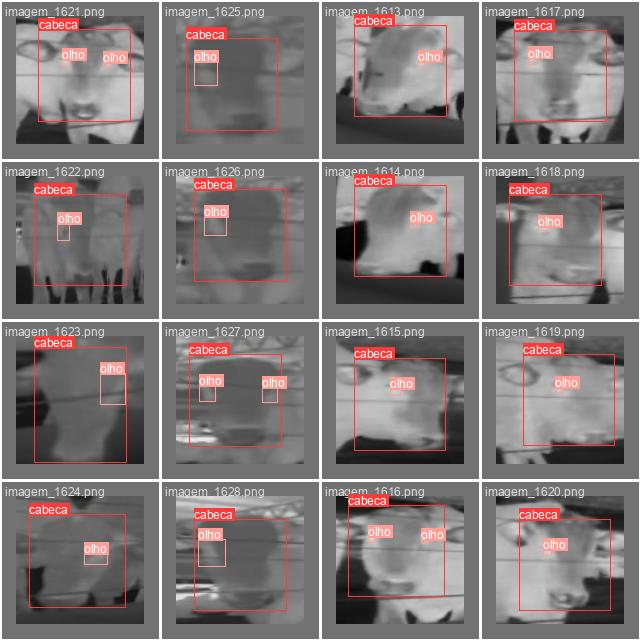

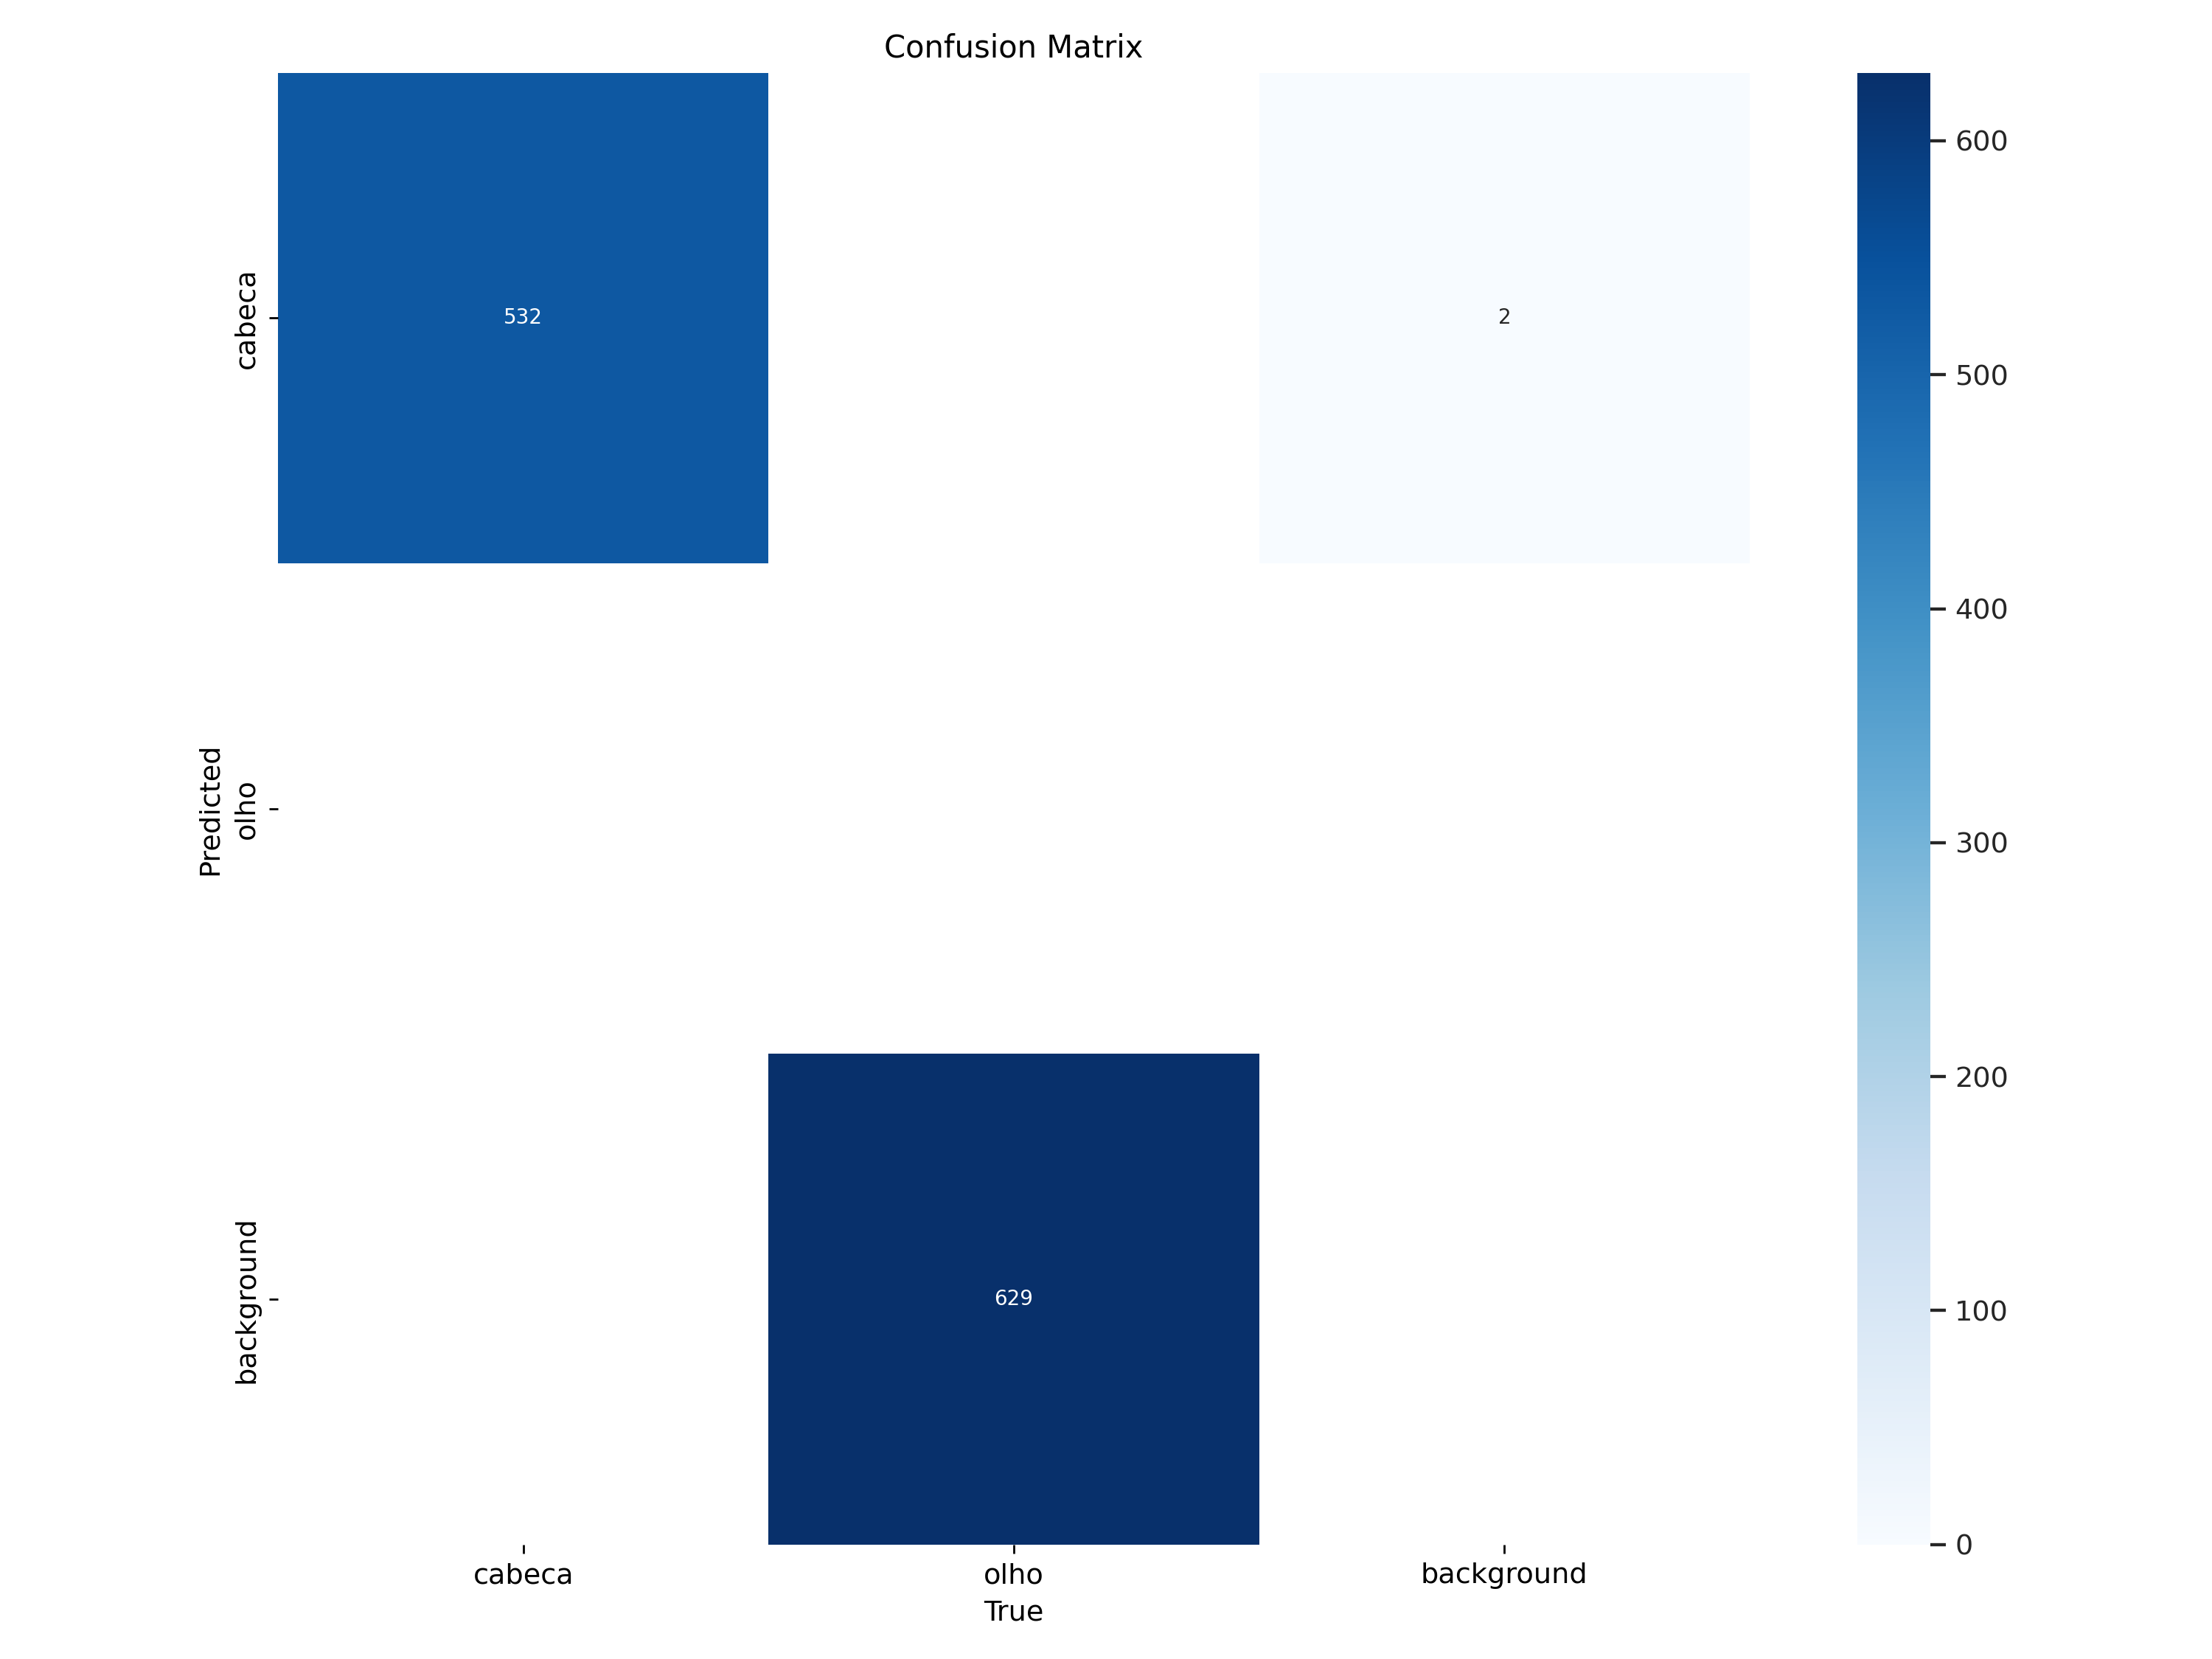

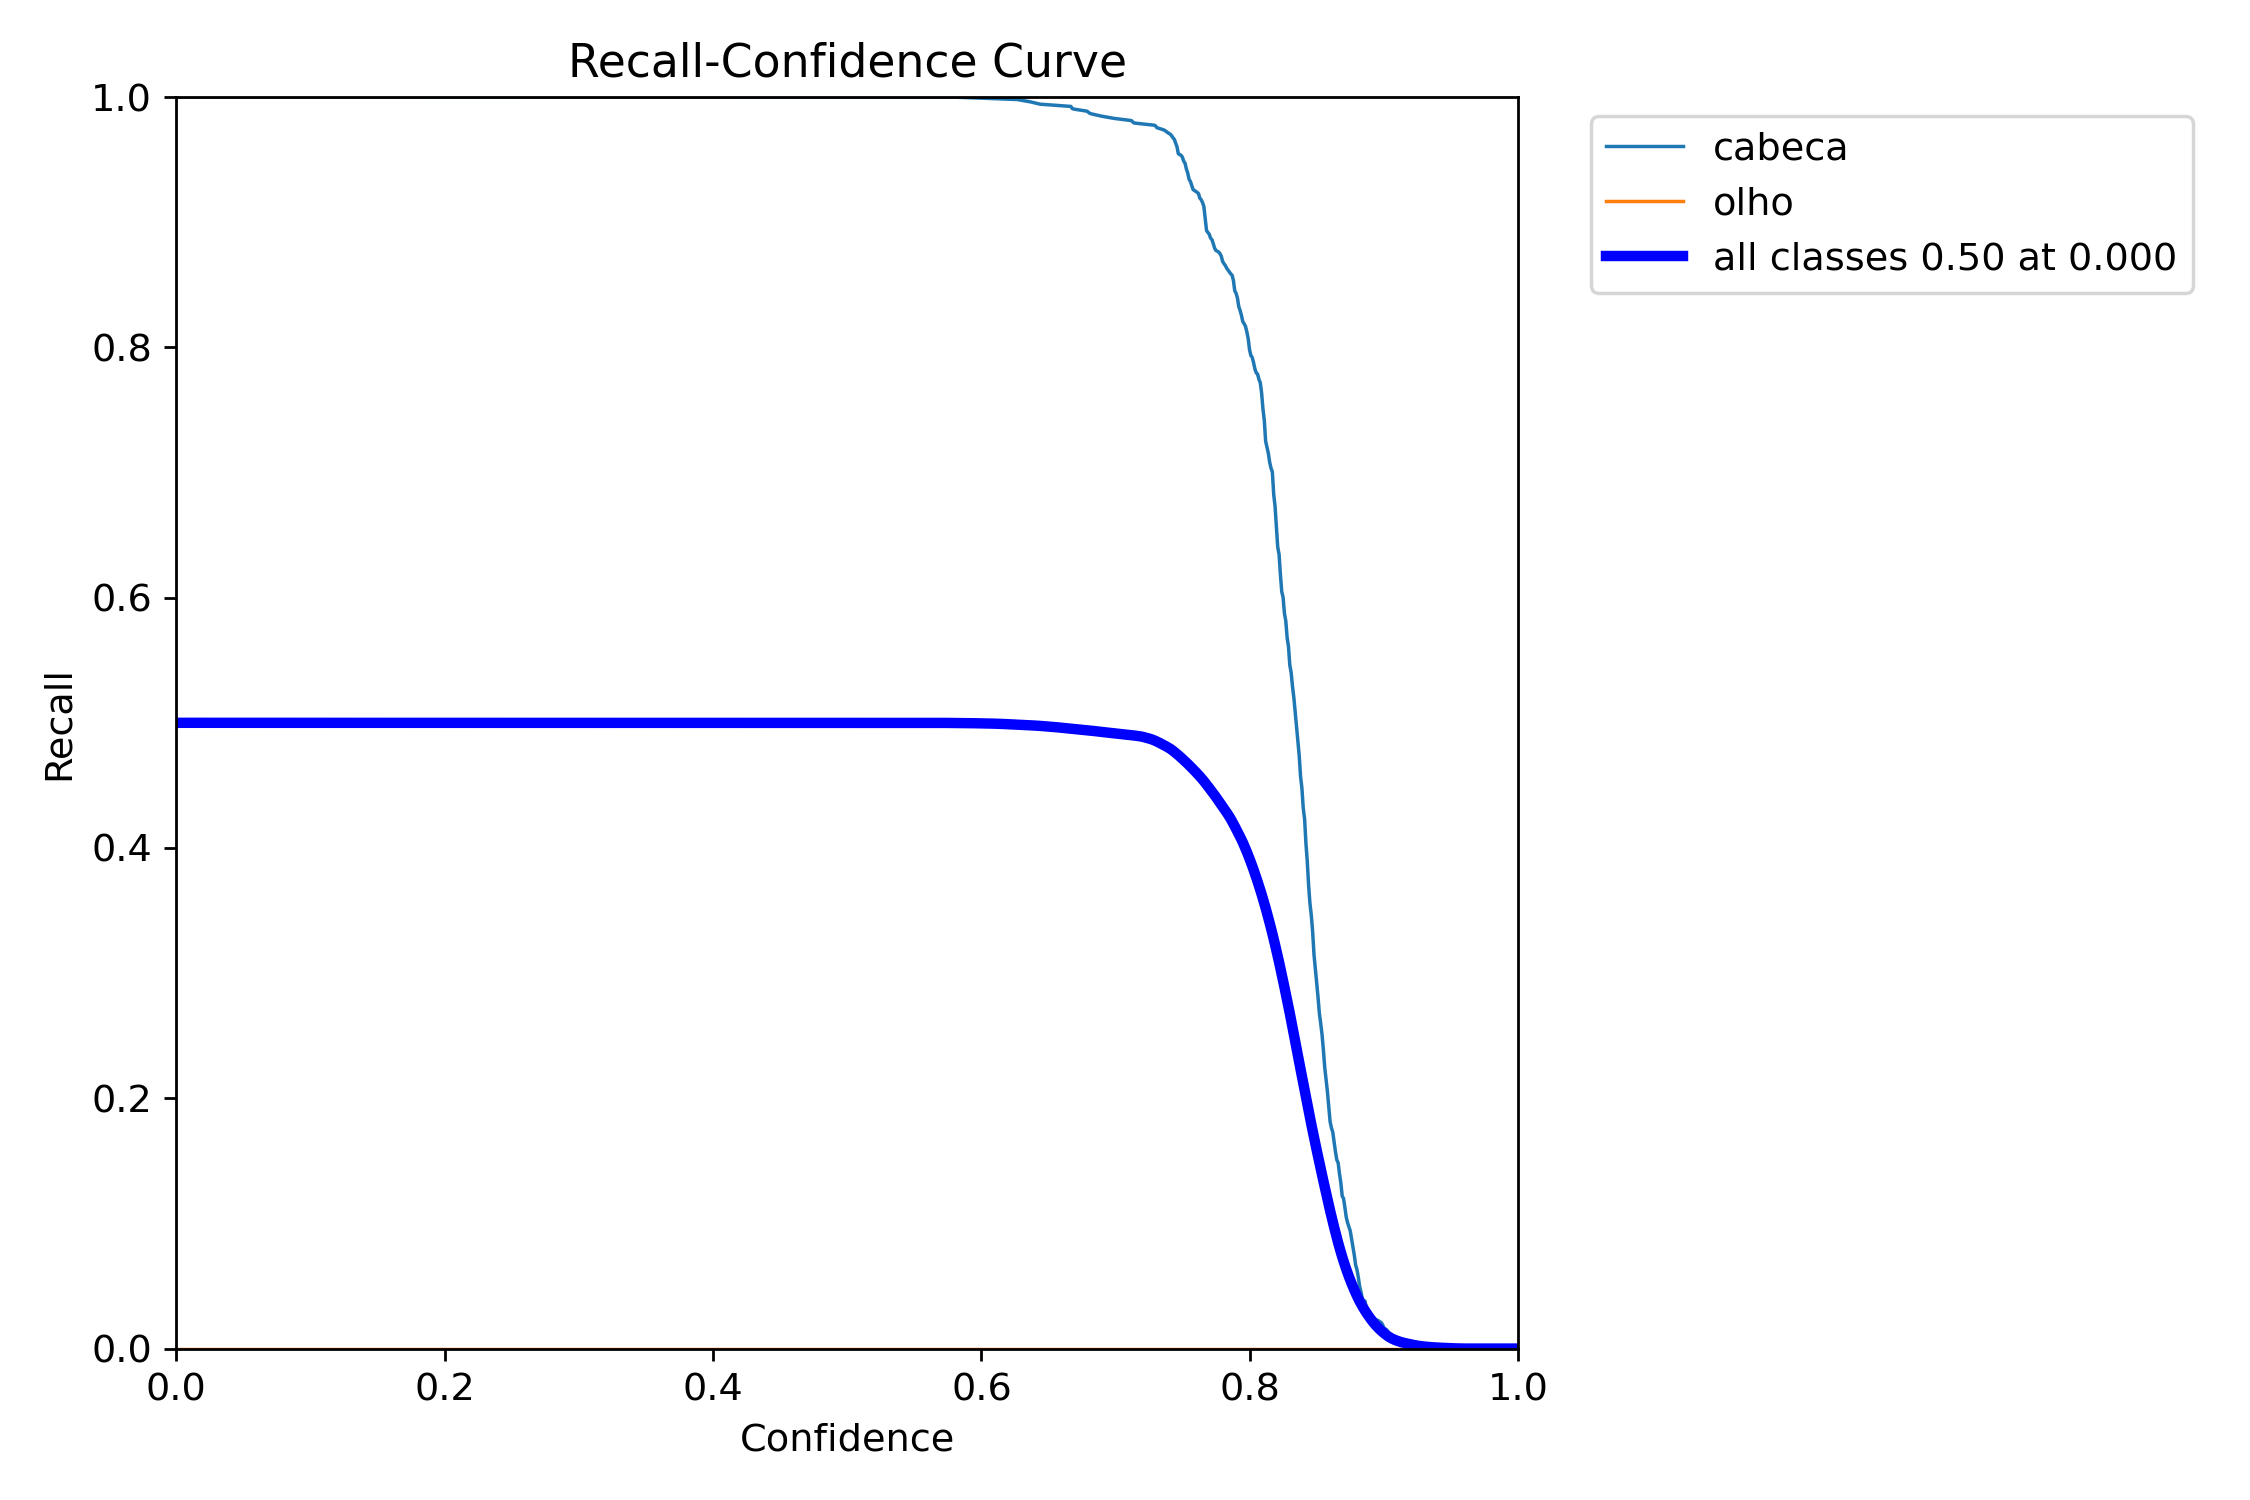

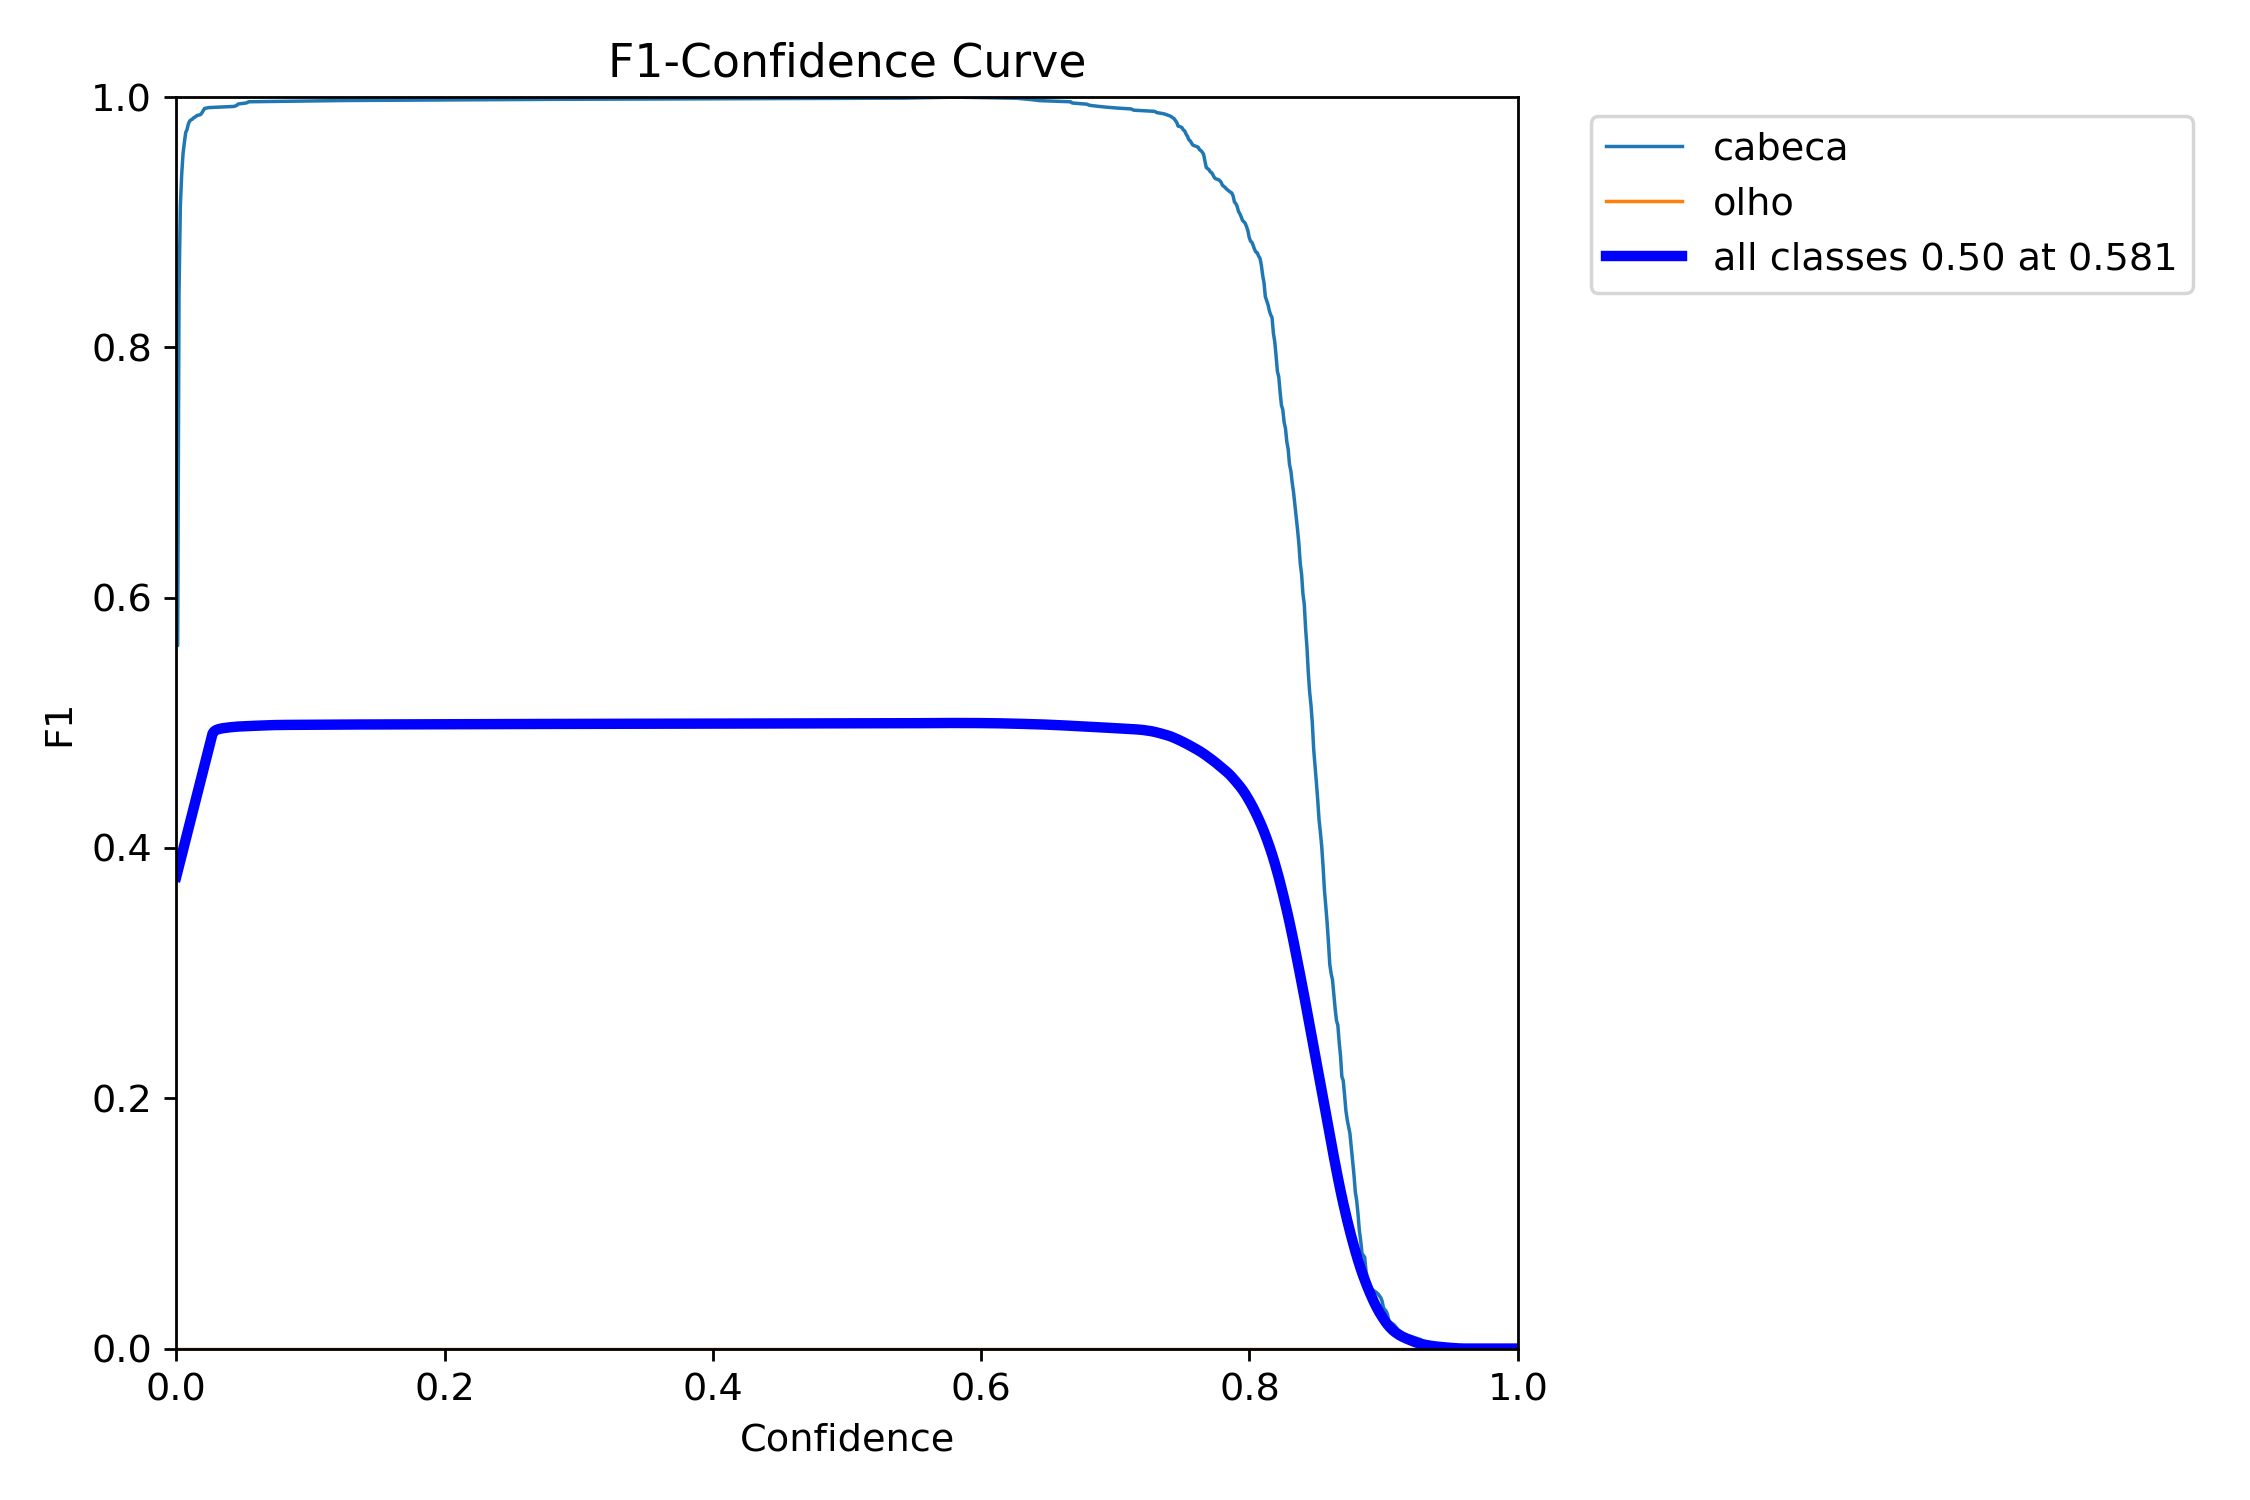

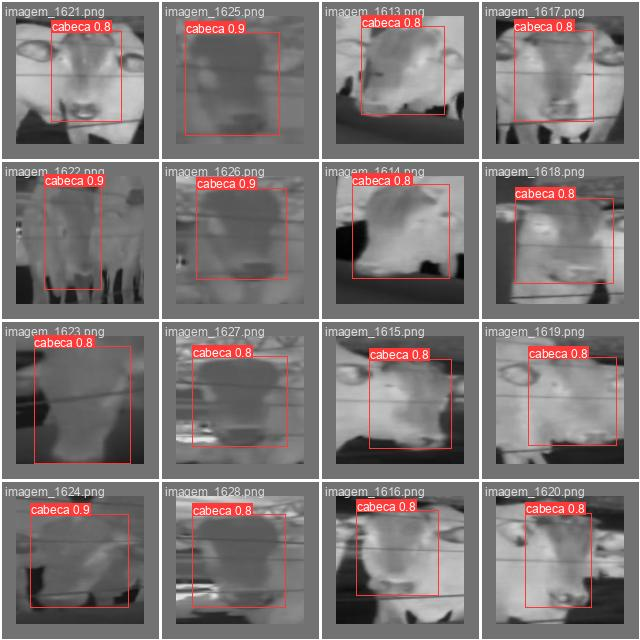

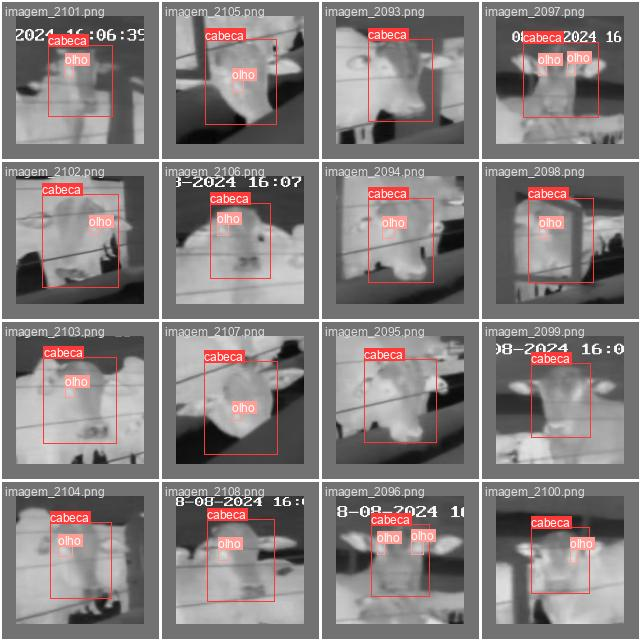

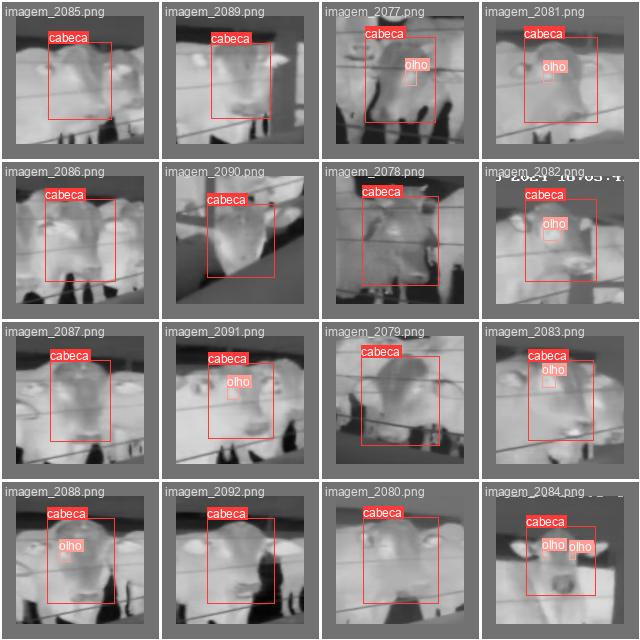

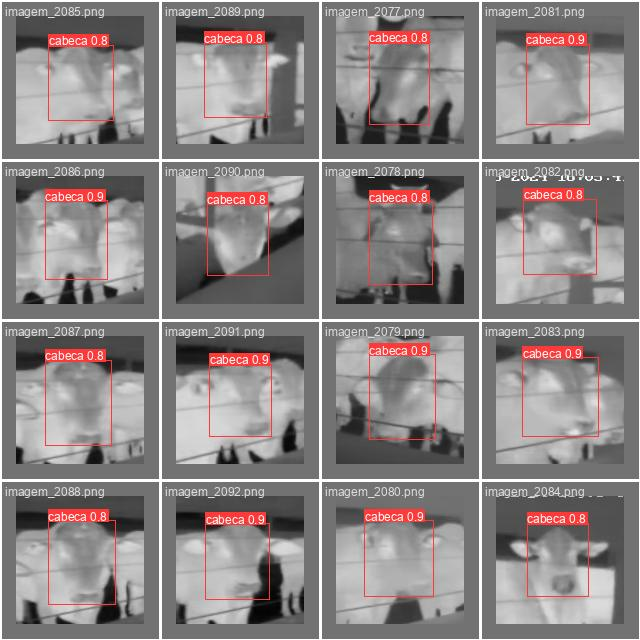

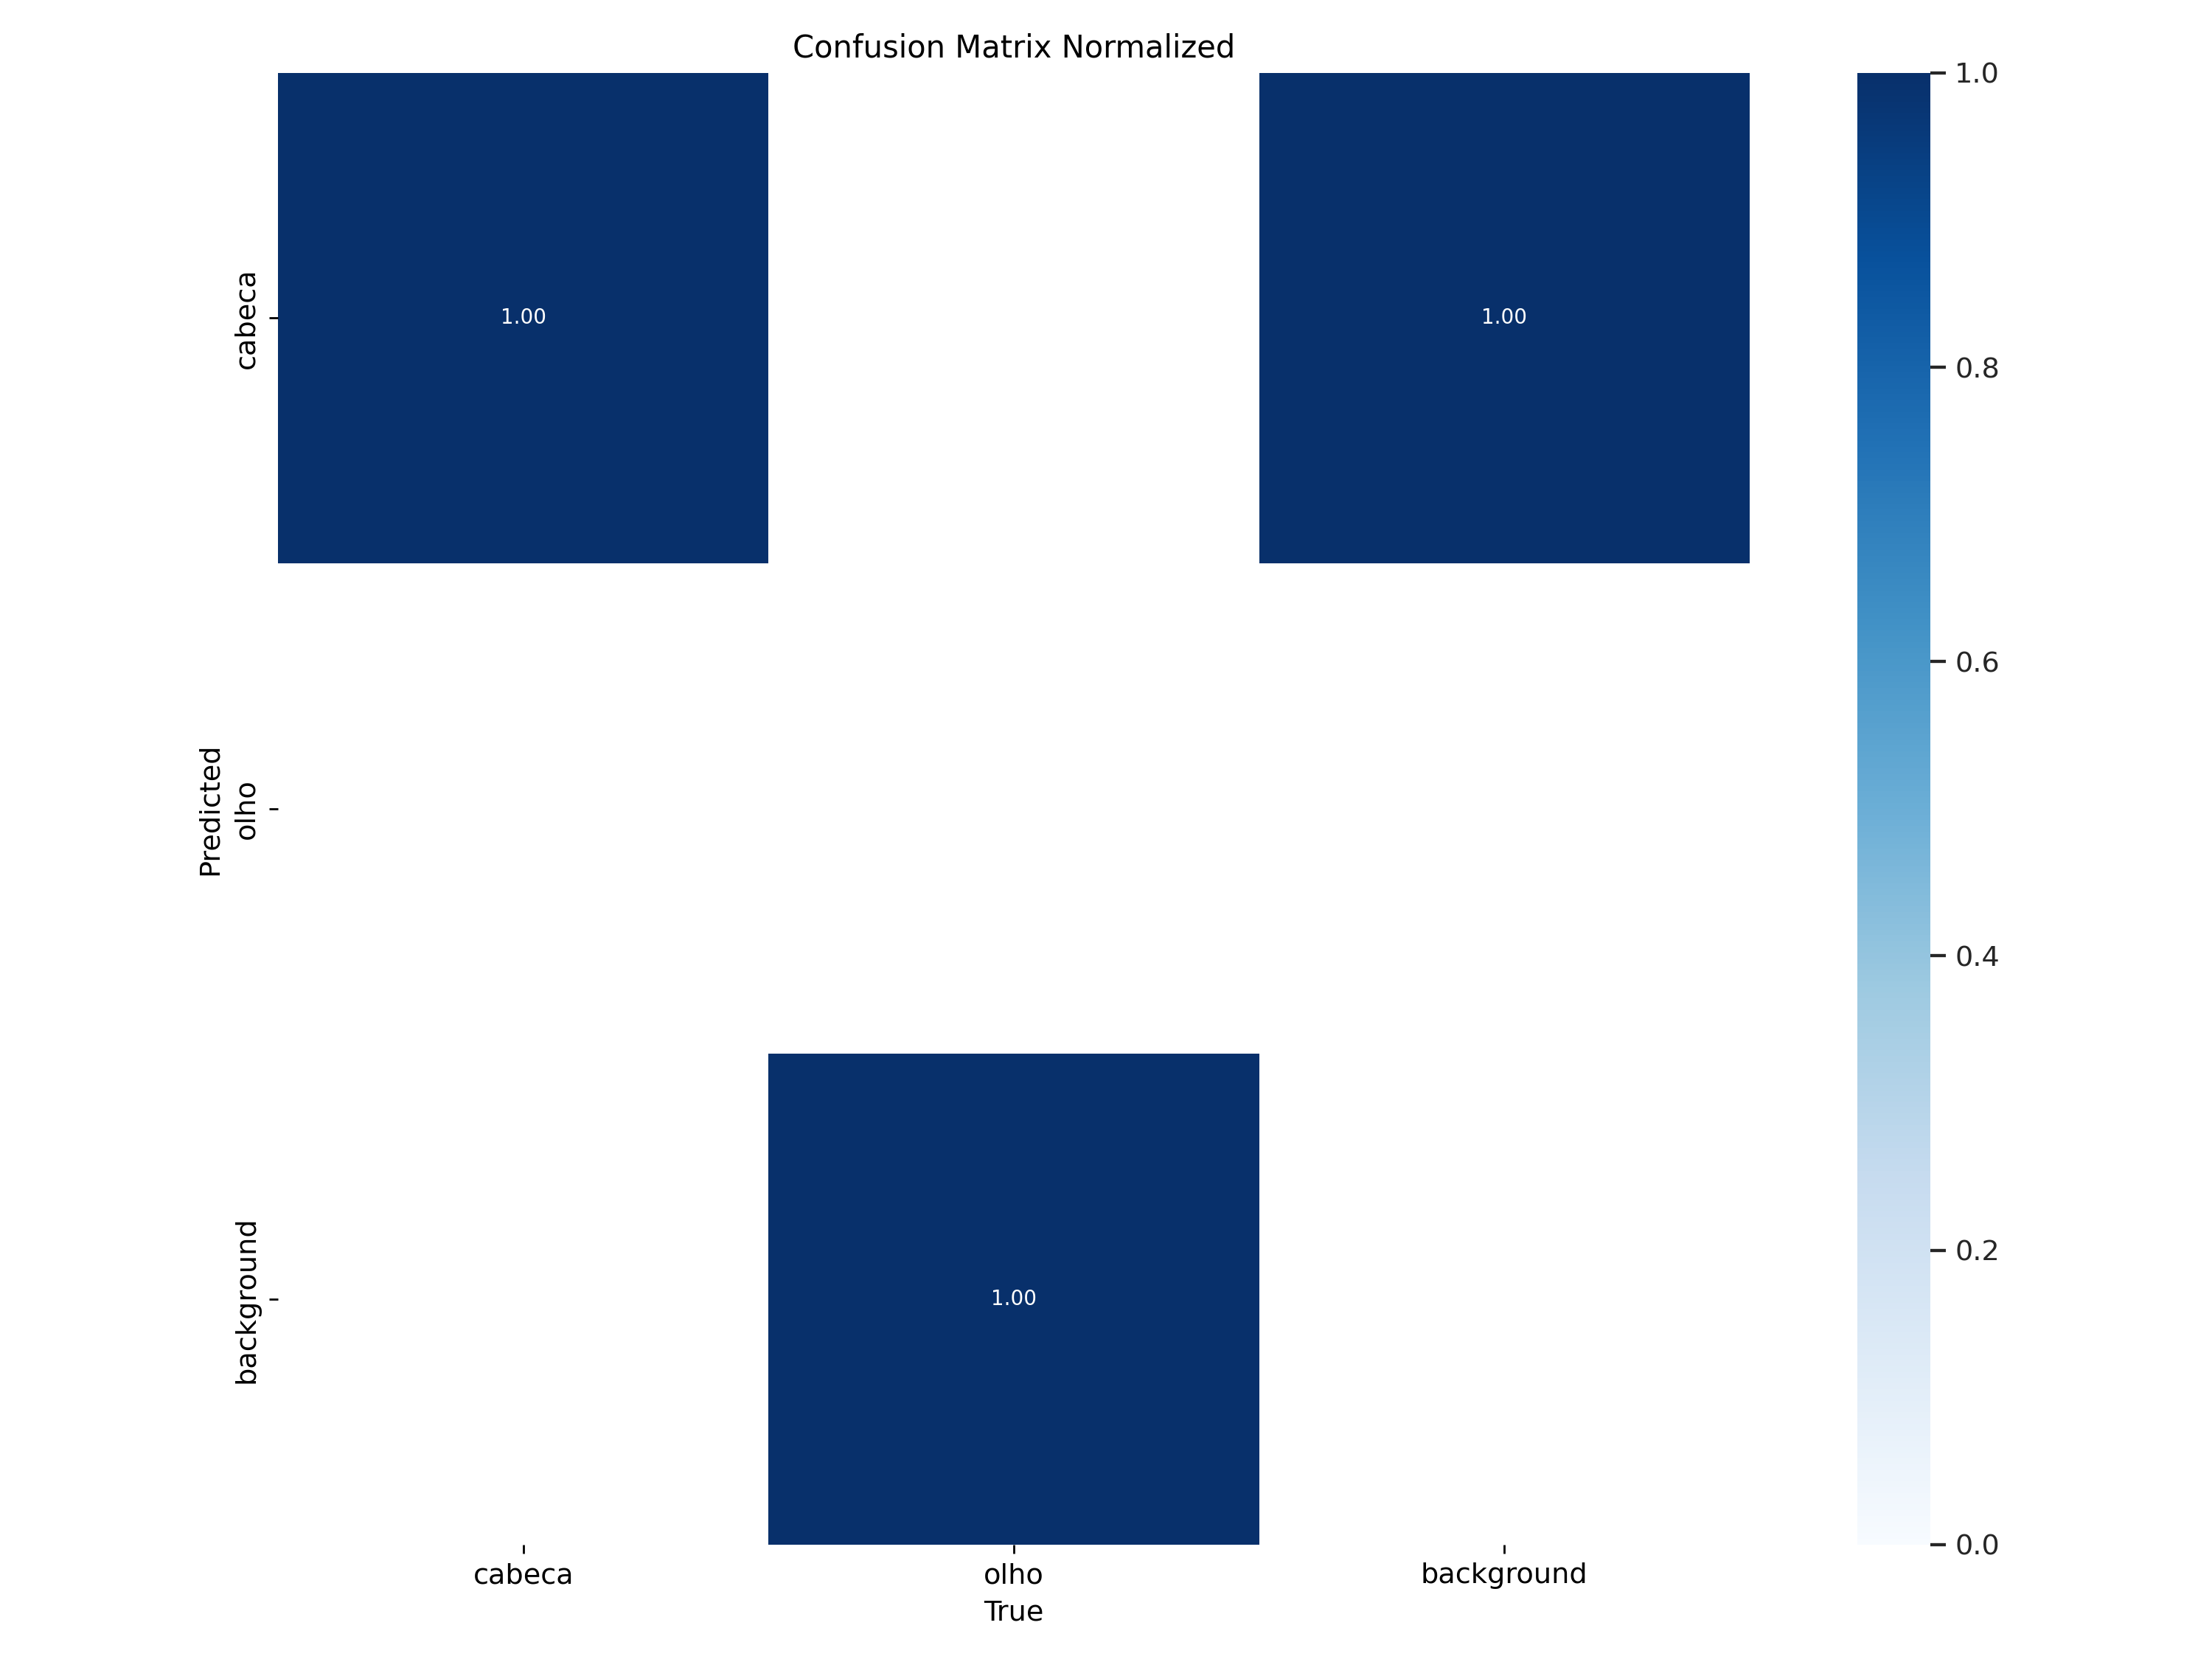

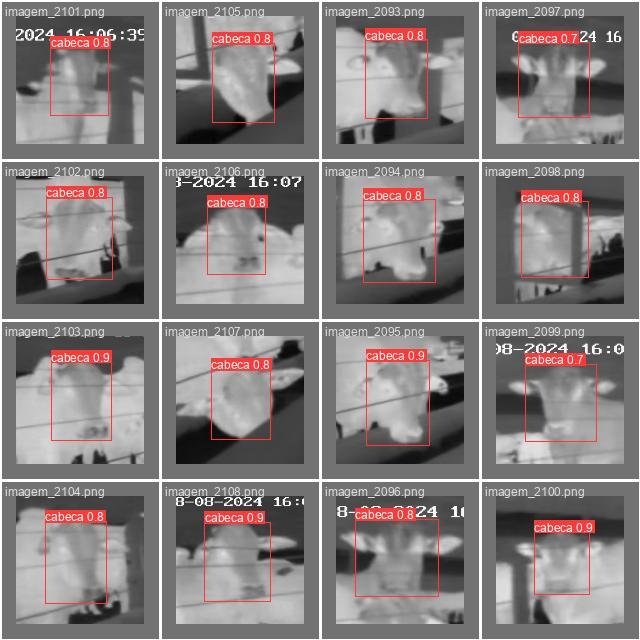

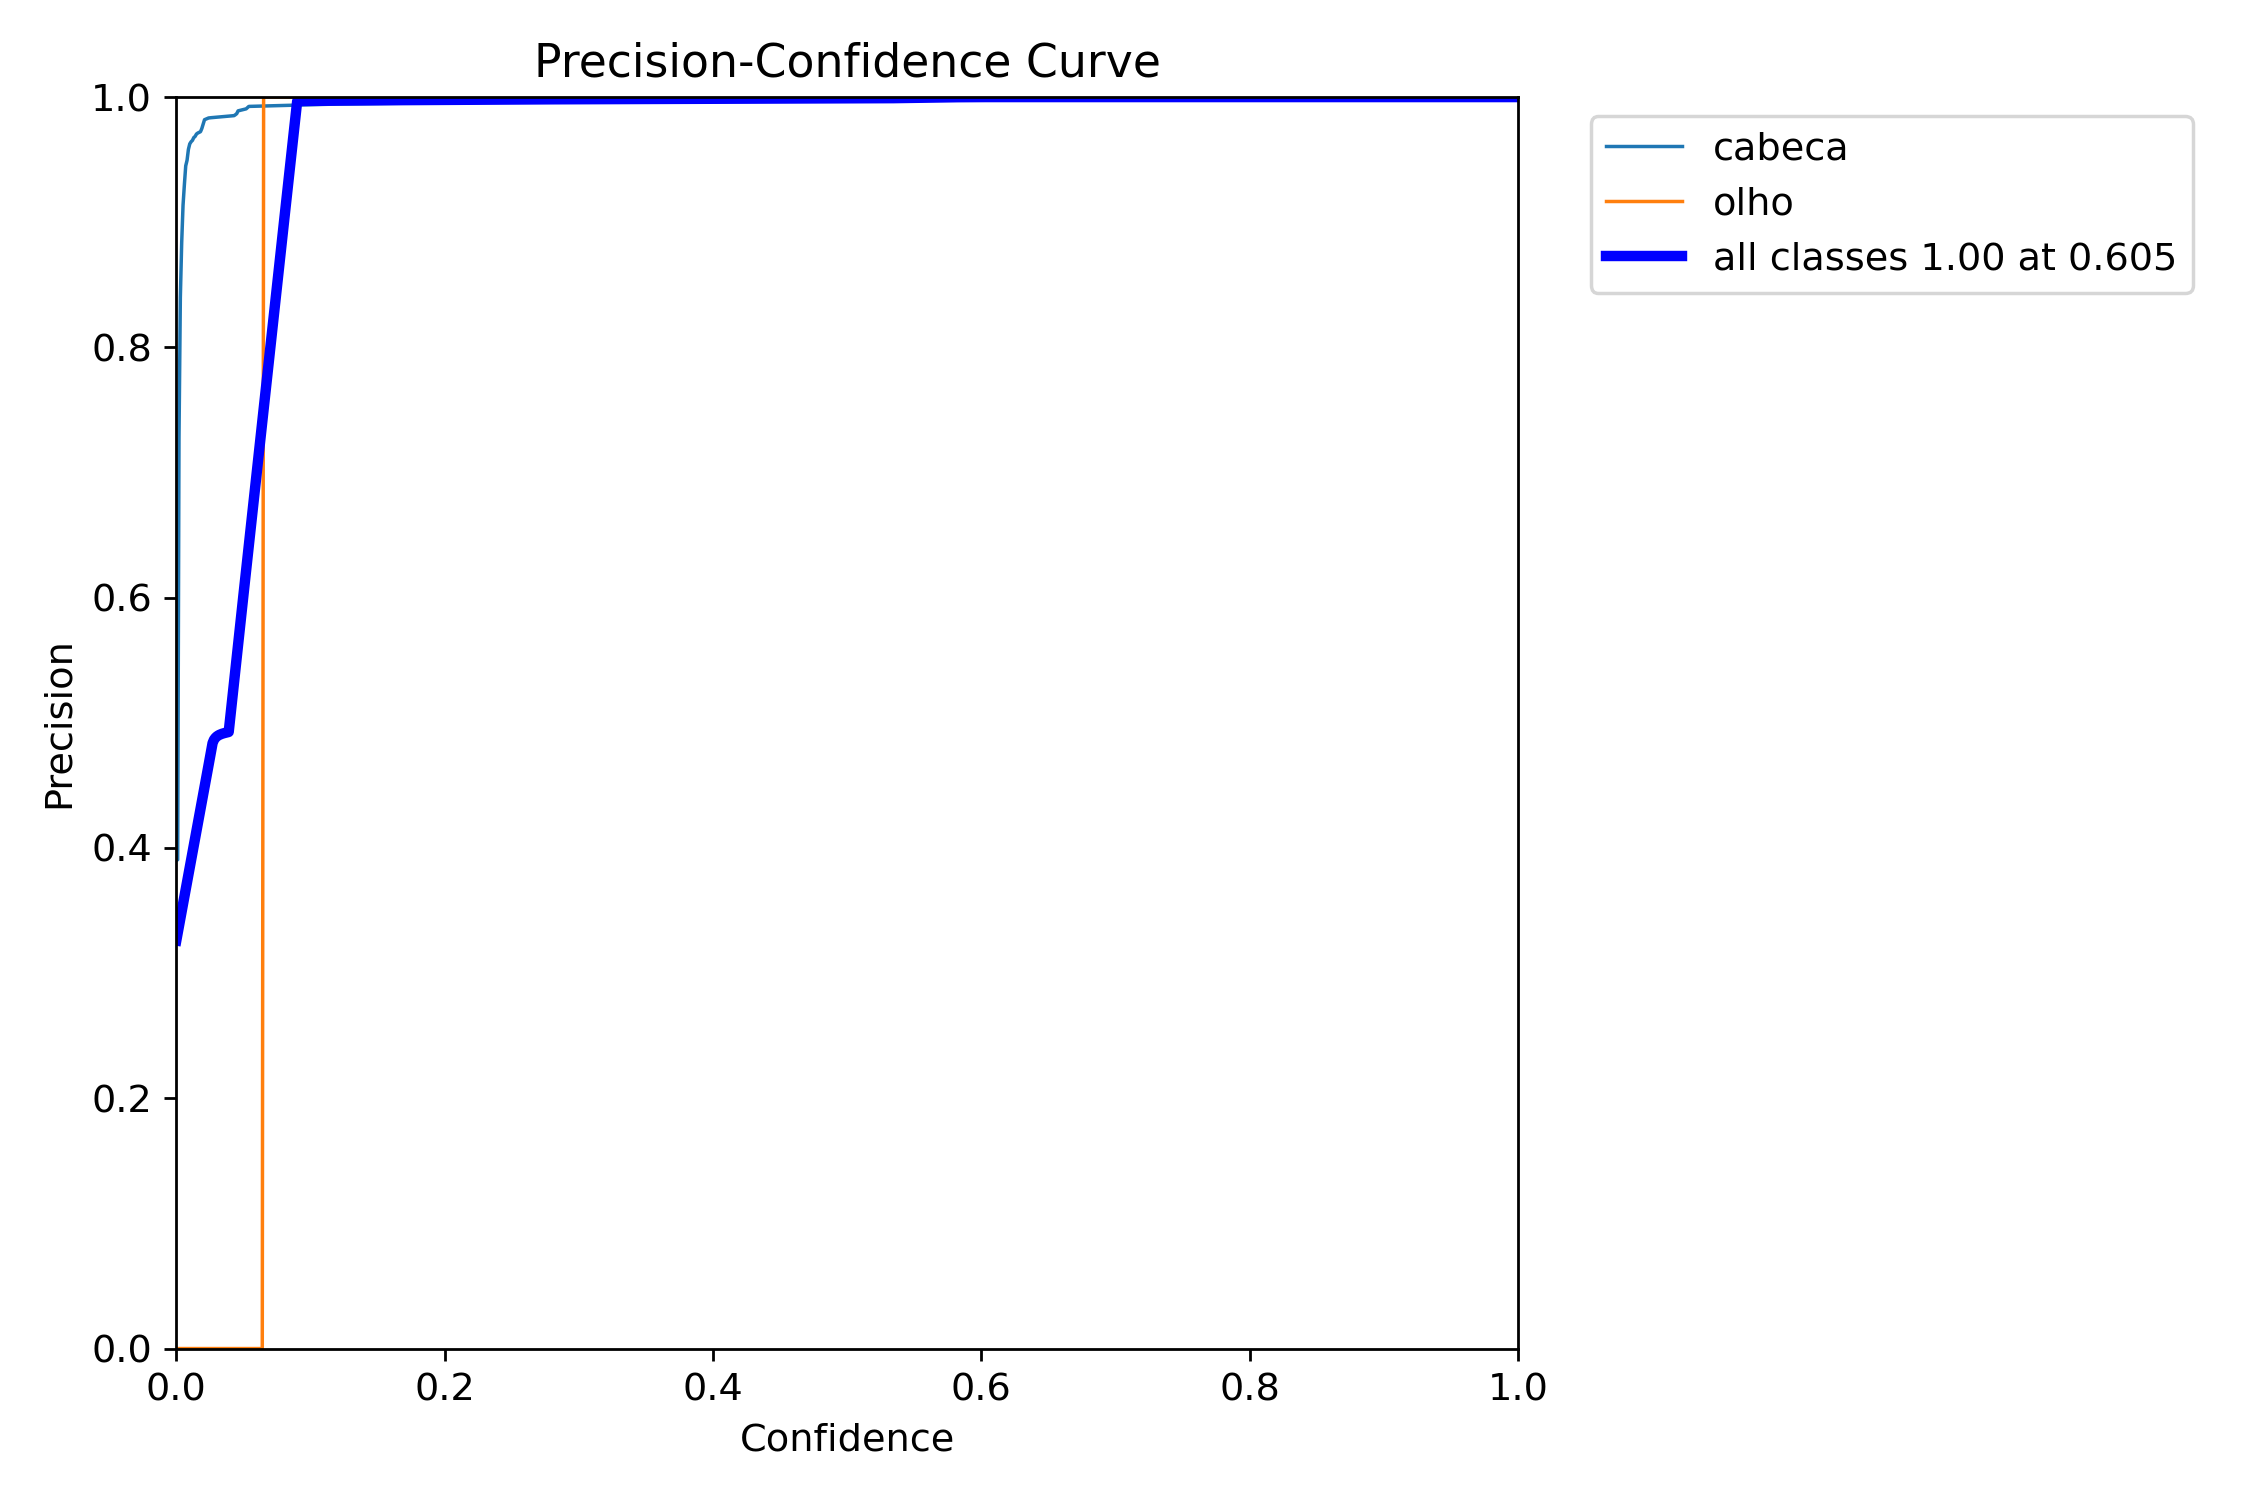

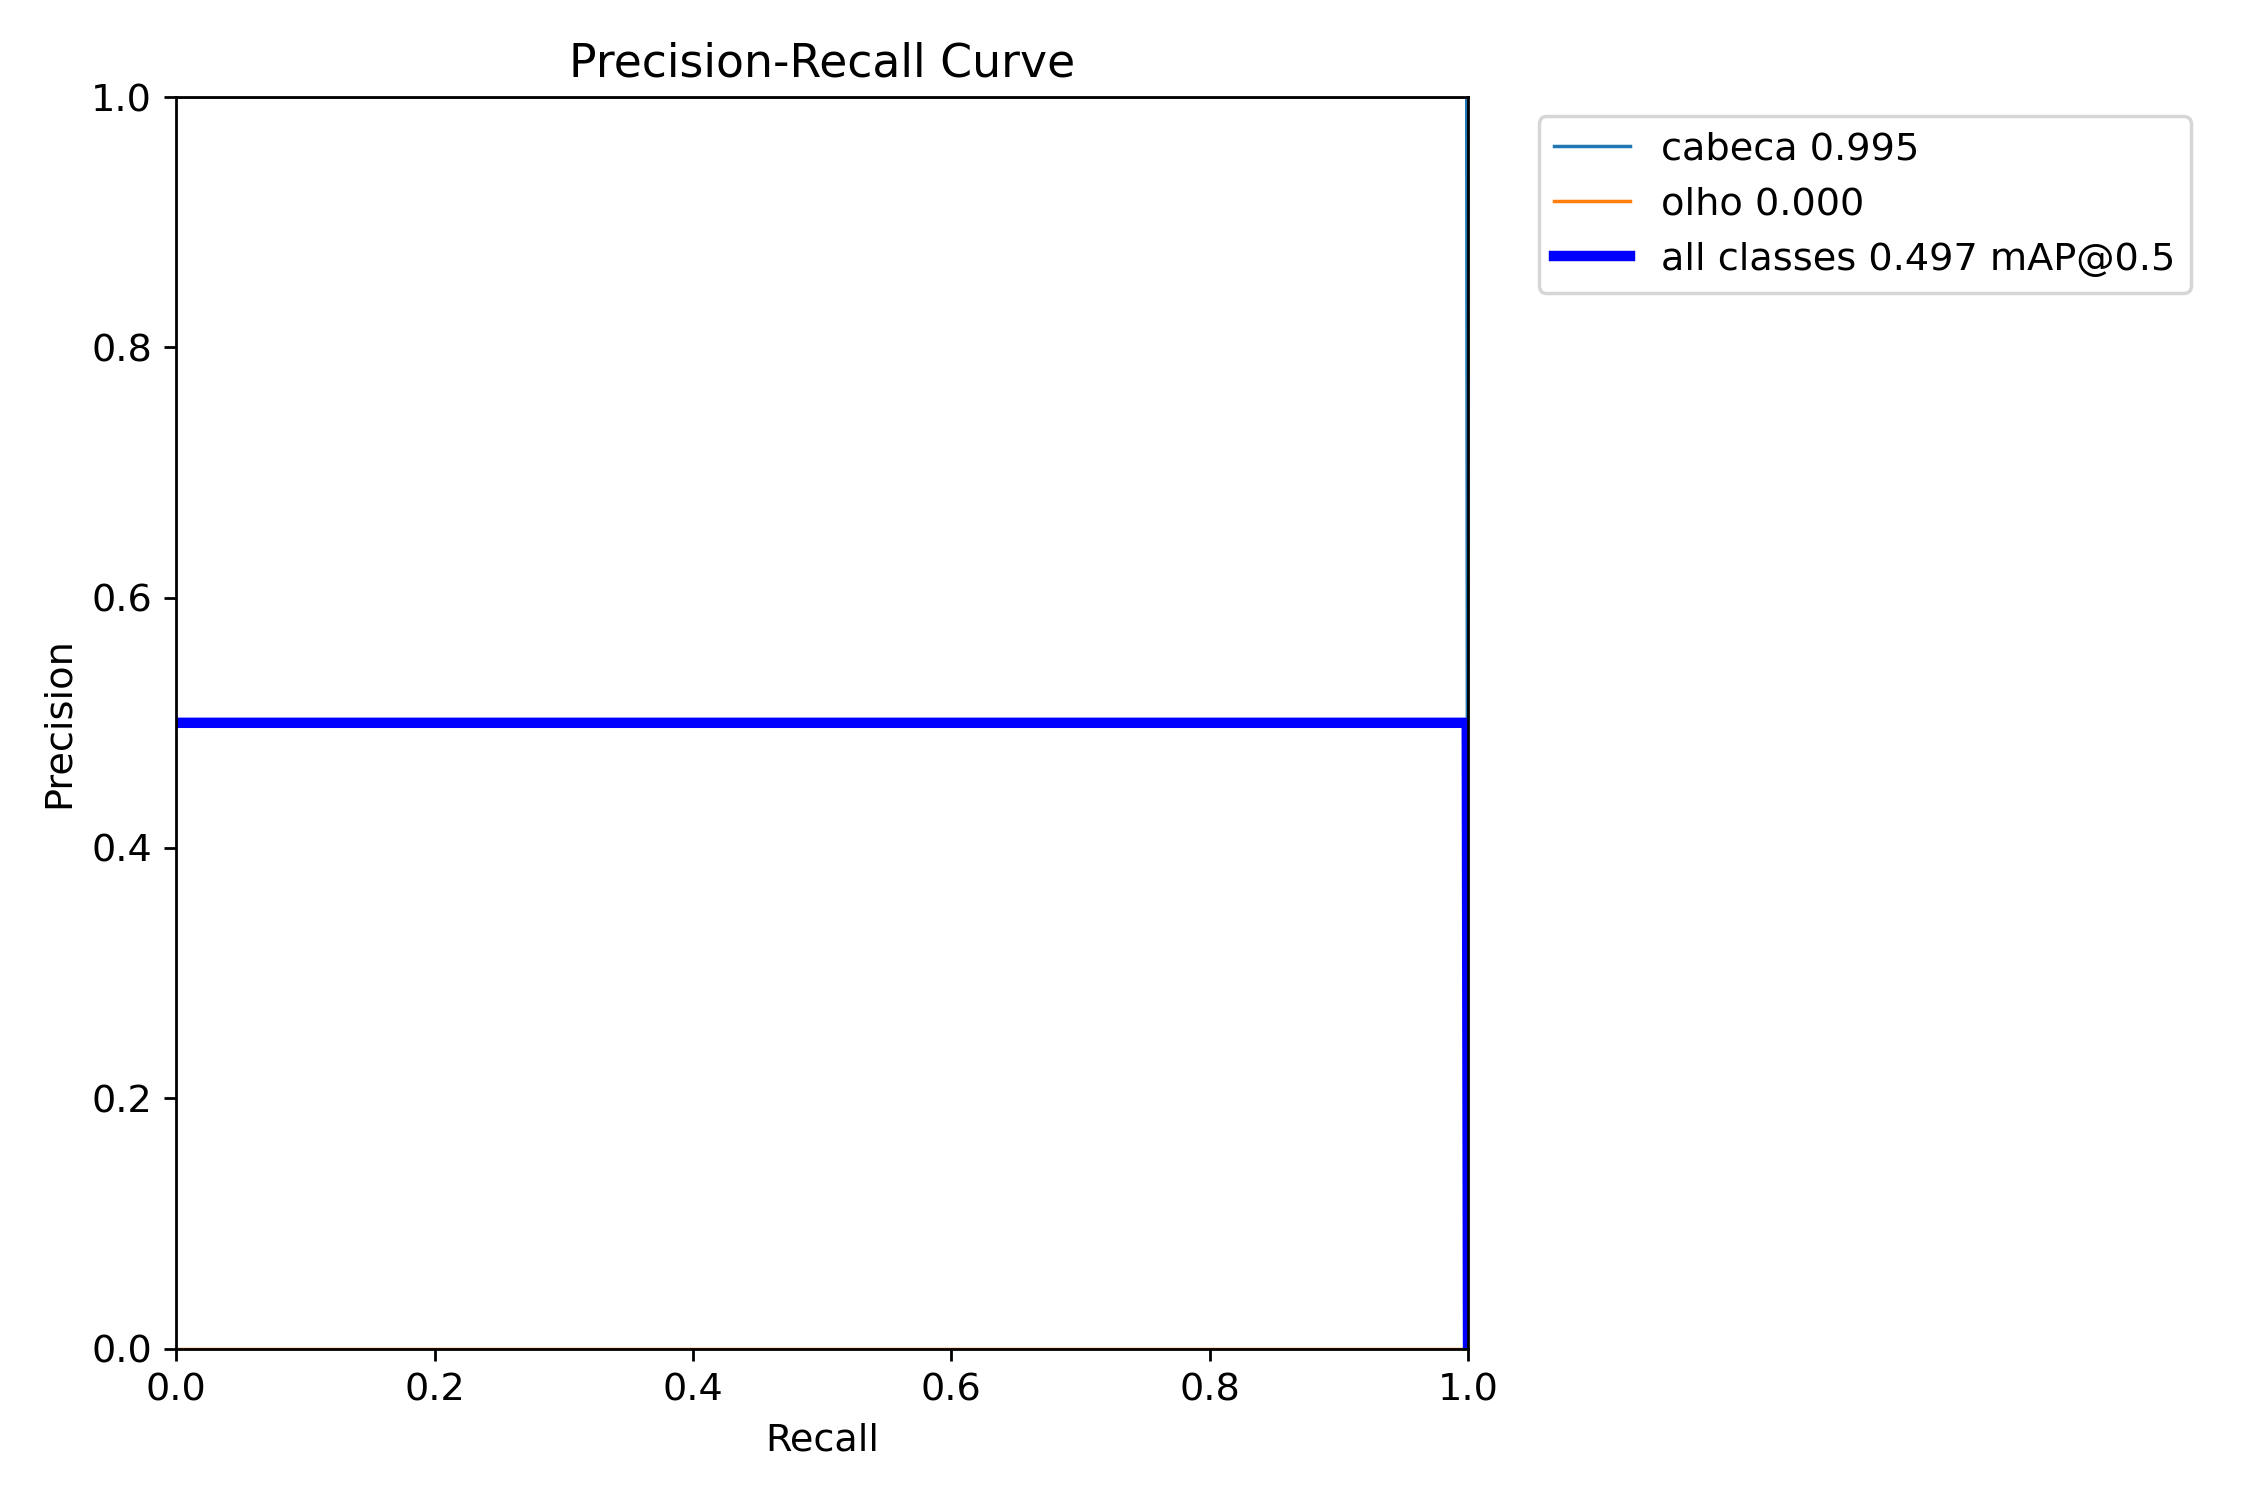

In [34]:
import cv2
from google.colab.patches import cv2_imshow

for img_name in result_images:
    img_path = os.path.join(results_dir, img_name)
    img = cv2.imread(img_path)
    cv2_imshow(img)
